# Análise exploratória de dados de smartphone sobre práticas de atividades

Este trabalho apresenta uma analise exploratória de dados referente a atividades humanas. Sendo elas:

* deitado
* sentado
* em pé
* caminhando
* subindo escada
* descendo escada.

Os dados foram obtidos monitorando a atividade de 30 participantes por meio de sensores acelerômetro e giroscópio de smartphone. Paralelamente, os participantes foram video monitorados para coletar as atividades realizadas manualmente.


Os dados foram disponibilizados pelo link https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

&nbsp;

&nbsp;
**Features:**

Dados referentes à aceleração tri-axial (XYZ) e à velocidade angular tri-axial (XYZ) foram obtidos do acelerômetro e do giroscópio, respectivamente. E, a aceleração foi segmentada em Body (chamada de 'BodyAcc') e Gravity ('GravityAcc'). Os dados do sensor giroscópio foram referidos como 'BodyGyro'. Os prefixos 't' e 'f' referem-se a tempo e frequencia do sinal, nessa ordem. Enquanto, o sufixo 'Mag' refere-se à magnitude da variável 3-axial.

Ademais, para cada uma das variáveis apuradas, foram apresentadas também suas propriedades, tais como, mínimo, máximo, desvio padrão, média, ângulo entre os vetores, entropia do sinal, entre outros. Ao todo são 561 features.   

&nbsp;

&nbsp;

## Instalando os pacotes necessários
---

In [1]:
import pandas as pd #processamento de dados
import numpy as np #algebra linear
import seaborn as sns

# Para plotar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

## Obtendo os dados
---

In [2]:
#Importando os conjuntos de treinamento e de teste do diretório de trabalho atual
treino = pd.read_csv('train.csv')

teste = pd.read_csv('test.csv')

In [3]:
print('Dimensões do conjunto de treino: {}'.format(treino.shape))
print('Dimensões do conjunto de teste : {}'.format(teste.shape))

Dimensões do conjunto de treino: (7352, 563)
Dimensões do conjunto de teste : (2947, 563)


In [4]:
# Expandindo o terminal que apresenta o cabeçalho do dadaframe, possibilitando visualizar todas as colunas.
pd.set_option("display.max_columns", None)

In [5]:
treino.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [6]:
# Valores unitários da variável de atividade
treino['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [7]:
# Valores unitários da váriável referente aos participantes (subject) 
treino['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

## Data cleaning
---

In [9]:
# Verificando a incidência de observações repetidas 
print('Número de observações duplicadas:')
print('- Conjunto de treino: {}'.format(treino.duplicated().sum()))
print('- Conjunto de teste: {}'.format(teste.duplicated().sum()))

Número de observações duplicadas:
- Conjunto de treino: 0
- Conjunto de teste: 0


In [10]:
# Verificando a incidência de valores faltantes
print('Contagem de valores faltantes:')
print('- Conjunto de treino: {}'.format(treino.isnull().sum().sum()))
print('- Conjunto de teste: {}'.format(teste.isnull().sum().sum()))

Contagem de valores faltantes:
- Conjunto de treino: 0
- Conjunto de teste: 0


## Verificando a distribuição dos dados
---

In [11]:
# Criando um dataframe com a contagem das ocorrências de cada atividade no conjundo de treino 
atividades_treino = pd.DataFrame(treino['Activity'].value_counts()).reset_index()
atividades_treino.columns.values[0] = "Atividade" #Renomeando a primeira coluna do dataframe 
atividades_treino.columns.values[1] = "Conjunto treino" #Renomeando a primeira coluna do dataframe


# O mesmo foi feito para o conjunto de teste
atividades_teste = pd.DataFrame(teste['Activity'].value_counts()).reset_index()
atividades_teste.columns.values[0] = "Atividade"
atividades_teste.columns.values[1] = "Conjunto teste"


# Unindo as informações de treino e teste num só dataframe
atividades_treino_teste = pd.merge(atividades_treino, atividades_teste, on=['Atividade'])

print(atividades_treino_teste)

            Atividade  Conjunto treino  Conjunto teste
0              LAYING             1407             537
1            STANDING             1374             532
2             SITTING             1286             491
3             WALKING             1226             496
4    WALKING_UPSTAIRS             1073             471
5  WALKING_DOWNSTAIRS              986             420


* Examinando a tabela de ocorrências das atividades, é possível verificar que estão relativamente balanceadas, em especial no conjunto de teste.

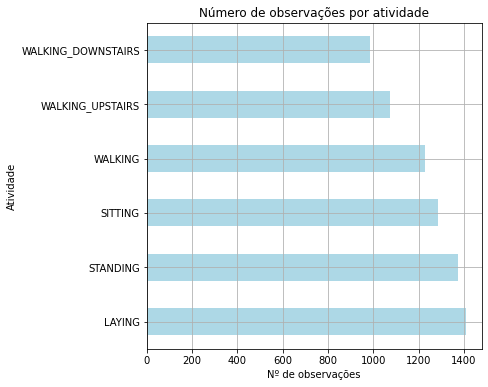

In [12]:
#Obtendo a visualização dos dados do conjunto de treino, também referente ao número de ocorrências por atividade.
plt.figure(figsize=(6,6))

treino['Activity'].value_counts().sort_values(ascending=False).plot(kind = 'barh', color = 'lightblue')
plt.title("Número de observações por atividade")
plt.ylabel('Atividade')
plt.xlabel('Nº de observações')
plt.grid(True)

plt.show();

* Por meio da visualização gráfica dos dados é possível observar melhor o balanceamento entre variáveis independentes.

## Obtendo as variáveis mais correlacionadas
---

In [13]:
#carregando um novo dataframe similar ao treino, para preservar o dataframe treino
df_treino_corr = pd.read_csv('train.csv')

label_encoder = LabelEncoder()
# Obtendo uma codificação numérica para a variável 'Activity', possibilitando a correlação com essa variável 
df_treino_corr['Activity'] = label_encoder.fit_transform(df_treino_corr['Activity'])

In [16]:
# Calculando a correlação entre as variáveis
corr = df_treino_corr.corr()


# Para remover as correlações duplicadas, foram eliminados os índices abaixo da diagonal 
tril = np.tril_indices_from(corr)

# Remoção de valores auto-correlacionados
for cap in zip(*tril):
    corr.iloc[cap[0], cap[1]] = np.NaN
    
# Convertendo a matriz de correlação em serie, e então, em dataframe
corr = (corr.stack().to_frame().reset_index().rename(columns={'level_0':'var_1','level_1':'var_2',0:'correlation'}))

# Adiciona ao dataframe criado uma coluna com os valores absolutos das correlações
corr['abs_correlation'] = corr.correlation.abs()

In [17]:
# As variáveis mais correlacionadas com a variável independente 'Activity
corr.sort_values('correlation', ascending=False).query('var_2=="Activity"')

,var_1,var_2,correlation,abs_correlation
139092,fBodyAccJerk-entropy()-X,Activity,0.845190,0.845190
86949,tBodyGyroJerk-entropy()-Z,Activity,0.844754,0.844754
53091,tBodyAccJerk-entropy()-Y,Activity,0.837034,0.837034
8871,tBodyAcc-sma(),Activity,0.835621,0.835621
104574,tBodyAccJerkMag-entropy(),Activity,0.835376,0.835376
...,...,...,...,...
28916,tGravityAcc-min()-Y,Activity,-0.749414,0.749414
66824,tBodyGyro-min()-Z,Activity,-0.776684,0.776684
47987,tBodyAccJerk-min()-X,Activity,-0.778826,0.778826
7776,tBodyAcc-min()-Y,Activity,-0.781408,0.781408


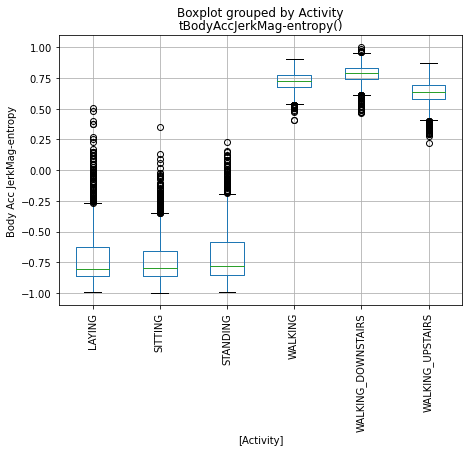

In [18]:
# Plotando o gráfico da feature que apresentou maior correlação positiva com a variável 'Activity'
ax = treino[['tBodyAccJerkMag-entropy()', 'Activity']].boxplot(by='Activity', figsize=(7,5))
ax.set_ylabel('Body Acc JerkMag-entropy');
plt.xticks(rotation=90);

* Por meio do gráfico, é possível notar separabilidade entre as variáveis de movimentação (walking) e aquelas de estagnação (laying, sitting, standing).

In [19]:
# Features mais correlacionadas
corr.sort_values('correlation', ascending=False).query('abs_correlation>0.9')

,var_1,var_2,correlation,abs_correlation
97132,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
96439,tBodyAccMag-arCoeff()3,tGravityAccMag-arCoeff()3,1.000000,1.000000
94312,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101591,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
95025,tBodyAccMag-iqr(),tGravityAccMag-iqr(),1.000000,1.000000
...,...,...,...,...
22739,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993502,0.993502
39375,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994256,0.994256
38887,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994684,0.994684
23260,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.995070,0.995070


* Muitas variáveis possuem alto grau de correlação. Assim, o dataset é elegível para redução de dimensionalidade.

## Investigando a separabilidade dos dados
---

Devido à alta dimensão dos dados, foi utilizado o algoritmo de incorporação estocástica de vizinho distribuído em t (t-SNE) para a visualização dos dados. 

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 2.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.094s
[t-SNE] Iteration 50: error = 106.1154480, gradient norm = 0.0132288 (50 iterations in 1.806s)
[t-SNE] Iteration 100: error = 90.6155396, gradient norm = 0.0105075 (50 iterations in 1.447s)
[t-SNE] Iteration 150: error = 87.3942261, gradient norm = 

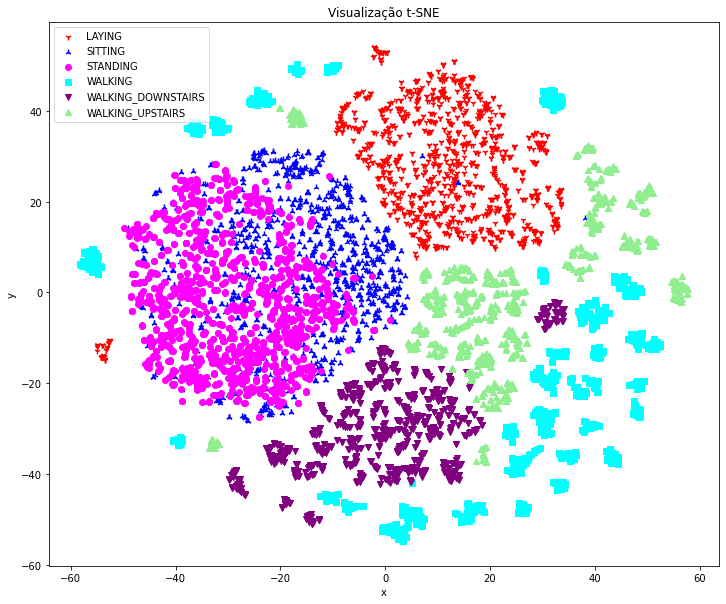

In [21]:
# Segmentando os subconjuntos de features e target
X_tsne = treino.drop(['subject', 'Activity'], axis=1)
y_tsne = treino['Activity']


# Aplicando o algoritmo de t-SNE
tsne = TSNE(n_components=2, verbose=2, perplexity=10, n_iter=500)
X_reduzido = tsne.fit_transform(X_tsne)


#Preparando a plotagem
# Lista de cores 
cor = {0:'red', 1:'blue', 2:'magenta', 3:'cyan', 4:'purple', 5:'lightgreen'}

# Lista de marcadores
marcador = ('1', '2', 'o', 's', 'v','^')


plt.figure(figsize=(12,10))	
for i, cs in enumerate(np.unique(y_tsne)):
	    plt.scatter(x=X_reduzido[y_tsne==cs,0], y=X_reduzido[y_tsne==cs,1], c=cor[i], marker=marcador[i], label=cs)


plt.title('Visualização t-SNE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

* As variáveis Sitting e Standing não apresentaram boa separabilidade entre si. Mas, as demais variáveis podem ser bem separadas. 